In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [147]:
train = pd.read_csv('../data/titanic/train.csv')
test = pd.read_csv('../data/titanic/test.csv')

## Feature Information

+ Passengerid 1-891 passenger id #
+ Survived: 0, 1 whether passenger survived or not
+ Pclass: 1, 2, 3 class of ticket
+ Name: string passenger name
+ Sex: string passenger sex
+ Age: float passenger age
+ SibSp: int # of siblings / spouses aboard
+ Parch: int # of parents / children aboard
+ Ticket: string ticekt number
+ Fare: float ticket price
+ Cabin: string cabin number
+ Embarked: char where passenger embarked, C = Cherbourg, Q = Queenstown, S = Southampton

In [148]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [149]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [150]:
def get_binned_avg(df):
    '''
    Gets avg age of passengers based on class and sex.
    Return list of avg ages in order Male class 1-3,
    Female class 1-3.
    '''
    data = df.copy().drop('Cabin', axis=1)
    data.dropna(inplace=True)
    sums = [0 for x in range(6)]
    nums = [0 for x in range(6)]
    for row in data.itertuples():
        if row.Sex == 'male':
            i = row.Pclass - 1
        else:
            i = 2 + row.Pclass
            
        sums[i] += row.Age
        nums[i] += 1
    return [round(x / y) for x, y in zip(sums, nums)]

In [151]:
def get_new_age(df, avgs):
    '''
    Generates new age column replacing NaNs with the
    average for the class and sex of a passenger.
    '''
    new_age = []
    for row in df.itertuples():
        if np.isnan(row.Age):
            if row.Sex == 'male':
                i = row.Pclass - 1
            else:
                i = 2 + row.Pclass
            new_age.append(avgs[i])
        else:
            new_age.append(row.Age)
    return new_age

In [152]:
train['Age'] = get_new_age(train, get_binned_avg(train))
test['Age'] = get_new_age(test, get_binned_avg(test))

In [153]:
train.drop('Cabin', axis=1, inplace=True)
train.dropna(inplace=True)
test.drop('Cabin', axis=1, inplace=True)
test.dropna(inplace=True)

In [154]:
train['Sex'] = pd.get_dummies(train['Sex'], drop_first=True)
train = pd.concat([train, pd.get_dummies(train['Embarked'], drop_first=True)], axis=1)
test['Sex'] = pd.get_dummies(train['Sex'], drop_first=True)
test = pd.concat([test, pd.get_dummies(test['Embarked'], drop_first=True)], axis=1)

In [155]:
train.drop('Embarked', axis=1, inplace=True)
test.drop('Embarked', axis=1, inplace=True)

In [156]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null uint8
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Q              889 non-null uint8
S              889 non-null uint8
dtypes: float64(2), int64(5), object(2), uint8(3)
memory usage: 112.1+ KB


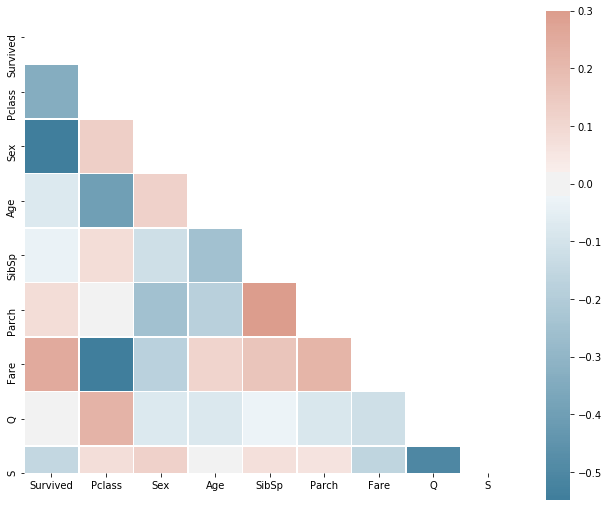

In [157]:
corr = train.drop(['Ticket', 'Name', 'PassengerId'], axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap,mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5)

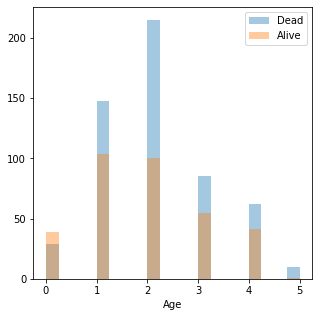

In [190]:
plt.figure(figsize=(5, 5))
sns.distplot(train[train['Survived']==0]['Age'], rug=False, kde=False, bins=20, label='Dead')
sns.distplot(train[train['Survived']==1]['Age'], rug=False, kde=False, bins=20, label='Alive')
plt.legend()

In [159]:
train.drop(['Ticket', 'PassengerId', 'Name'], axis=1).head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [243]:
chances = pd.DataFrame(columns=['Fare', 'Sex', 'Survival Chance'])
fares = [8, 15, 30, 100, 500]
i = 0
for num in range(4):
    for sex in range(2):
        chance = np.sum(train[(train['Fare']==num + 1) & (train['Sex'] == sex)]['Survived'])
        chance /= len(train[(train['Fare']==num + 1) & (train['Sex'] == sex)])
        sex = 'male' if sex == 1 else 'female'
        chances.loc[i] = ['under ' + str(fares[num]), sex, chance]
        i += 1

In [244]:
chances

,Fare,Sex,Survival Chance
0,under 8,female,0.621212
1,under 8,male,0.140000
2,under 15,female,0.705882
3,under 15,male,0.247706
4,under 30,female,0.822785
5,under 30,male,0.330189
6,under 100,female,0.941176
7,under 100,male,0.368421


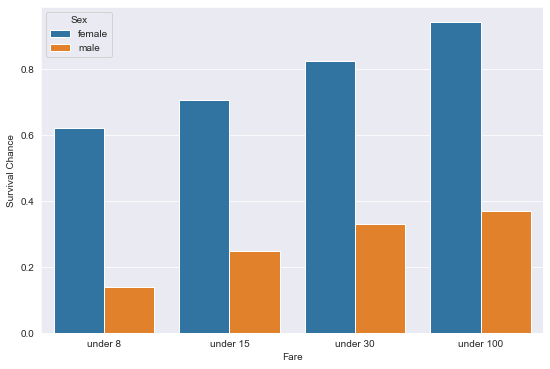

In [245]:
plt.figure(figsize=(9, 6))
sns.set_style('darkgrid')
sns.barplot(data=chances, y='Survival Chance', x='Fare', hue='Sex')

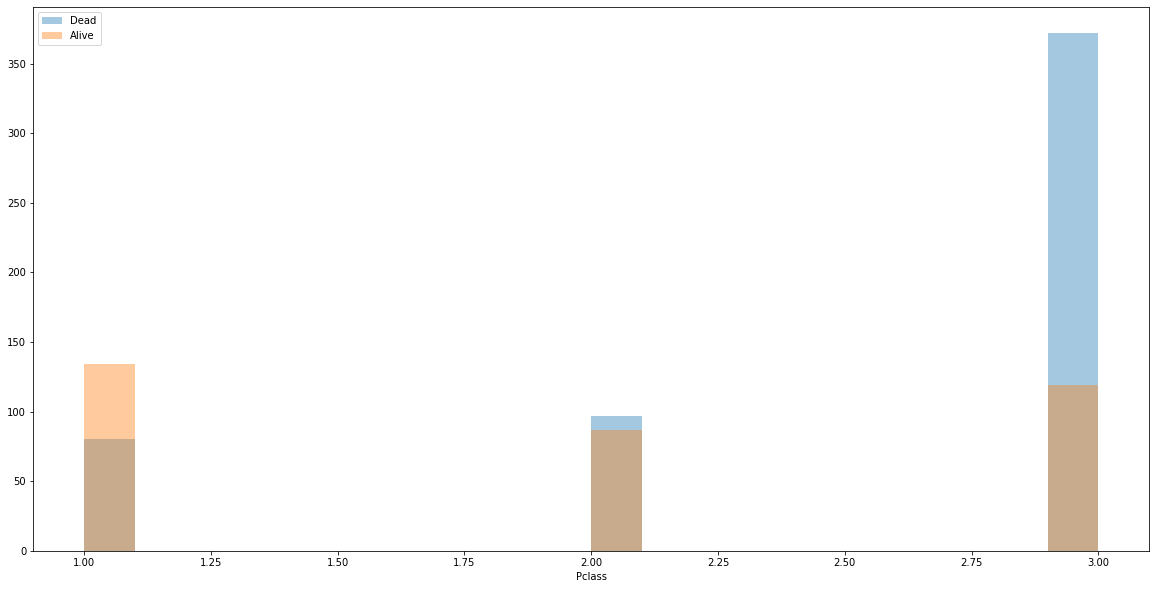

In [160]:
plt.figure(figsize=(20, 10))
sns.distplot(train[train['Survived']==0]['Pclass'], rug=False, kde=False, bins=20, label='Dead')
sns.distplot(train[train['Survived']==1]['Pclass'], rug=False, kde=False, bins=20, label='Alive')
plt.legend()

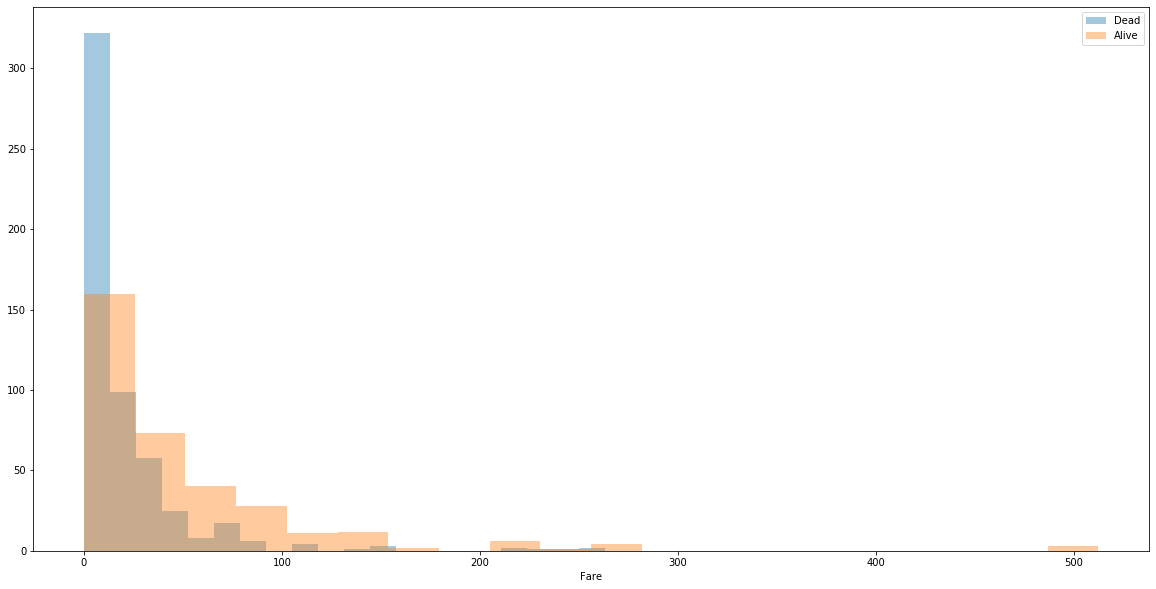

In [161]:
plt.figure(figsize=(20, 10))
sns.distplot(train[train['Survived']==0]['Fare'], rug=False, kde=False, bins=20, label='Dead')
sns.distplot(train[train['Survived']==1]['Fare'], rug=False, kde=False, bins=20, label='Alive')
plt.legend()

In [162]:
from sklearn.model_selection import train_test_split
training_data = train[['Survived', 'Sex', 'Age', 'Fare', 'Parch', 'S']]
X = training_data.drop('Survived', axis=1)
y = training_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

lr = LogisticRegression(max_iter=500, solver='lbfgs')
lda = LinearDiscriminantAnalysis()
rfc = RandomForestClassifier(n_estimators=100)
models = [lr, lda, rfc]
for model in models:
    model.fit(X_train, y_train)
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test) 

In [164]:
# Logistic Regression
lr.score(X_train, y_train) * 100

79.18424753867792

In [165]:
# Linear Discriminant Analysis
lda.score(X_train, y_train) * 100

79.88748241912799

In [166]:
# Stochastic Gradient Descent
sgd.score(X_train, y_train)* 100

67.9324894514768

In [167]:
# K Nearest-Neighbors
knn.score(X_train, y_train)* 100

83.96624472573839

In [168]:
# Decision Tree
decision_tree.score(X_train, y_train)* 100

98.17158931082982

In [169]:
# Random Froest Classifier
rfc.score(X_train, y_train) * 100

98.17158931082982

In [170]:
def bin_col(age, bins=[12, 25, 35, 45, 65]):
    for i, num in enumerate(bins):
        if age < num:
            return i
    return len(bins)

In [171]:
train['Age'] = train['Age'].apply(bin_col)
test['Age'] = test['Age'].apply(bin_col)

In [172]:
train['Fare'].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [173]:
train['Fare'] = train['Fare'].apply(bin_col, args=([8, 15, 30, 100],))
test['Fare'] = test['Fare'].apply(bin_col, args=([8, 15, 30, 100],))

In [174]:
def bin_title(title):
    titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    title = title.split('.')[0].split()[-1]
    if  title in titles.keys():
        return titles[title]
    else:
        return 5

In [175]:
train['Name'] = train['Name'].apply(bin_title)
test['Name'] = test['Name'].apply(bin_title)

In [176]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null int64
Sex            889 non-null uint8
Age            889 non-null int64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null int64
Q              889 non-null uint8
S              889 non-null uint8
dtypes: int64(8), object(1), uint8(3)
memory usage: 112.1+ KB


In [177]:
from sklearn.model_selection import train_test_split
training_data = train.drop('Ticket', axis=1)
X = training_data.drop('Survived', axis=1)
y = training_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
lr = LogisticRegression(max_iter=500, solver='lbfgs')
lda = LinearDiscriminantAnalysis()
rfc = RandomForestClassifier(n_estimators=100)
models = [lr, lda, rfc]
for model in models:
    model.fit(X_train, y_train)
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test) 

In [179]:
# Logistic Regression
lr.score(X_train, y_train) * 100

81.85654008438819

In [180]:
# Linear Discriminant Analysis
lda.score(X_train, y_train) * 100

81.43459915611815

In [182]:
# Stocahsitc Gradient Descent
sgd.score(X_train, y_train)* 100

39.80309423347398

In [183]:
# K Nearest-Neighbors
knn.score(X_train, y_train)* 100

79.32489451476793

In [188]:
# Decision Tree
decision_tree.score(X_test, y_test)* 100

76.96629213483146

In [187]:
# Random Forest
rfc.score(X_test, y_test)* 100

79.21348314606742